# Building permit

## Description

Origin: Chicago data portal (https://data.cityofchicago.org/)

Last updated: xx/xx/xxxx

## Packages (Python)

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geojson

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go

import geopandas as gpd
import geopy as gp
import shapely
import geojson
#import rtree
#import pygeos
#import fiona

In [ ]:
# Preprocessing files
from preprocessing import *

## Chicago Polygon 

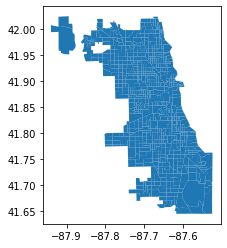

In [ ]:
# Reading file that must be uploaded

chicago = gpd.read_file('chicago.shp')
chicago.plot()

## Data processing

In [ ]:
building_permit_api = 'https://data.cityofchicago.org/resource/building-permits.json'
building_permit = pd.read_json(building_permit_api)

In [ ]:
building_permit.head()

,id,permit_,permit_type,review_type,application_start_date,issue_date,processing_time,street_number,street_direction,street_name,suffix,work_description,building_fee_paid,zoning_fee_paid,other_fee_paid,subtotal_paid,building_fee_unpaid,zoning_fee_unpaid,other_fee_unpaid,subtotal_unpaid,building_fee_waived,zoning_fee_waived,other_fee_waived,subtotal_waived,total_fee,contact_1_type,contact_1_name,contact_1_city,contact_1_state,contact_1_zipcode,reported_cost,pin1,community_area,ward,census_tract,contact_2_type,contact_2_name,contact_2_city,contact_2_state,contact_2_zipcode,...,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux,contact_6_type,contact_6_name,contact_6_city,contact_6_state,contact_6_zipcode,contact_7_type,contact_7_name,contact_7_city,contact_7_state,contact_7_zipcode,contact_8_type,contact_8_name,contact_8_city,contact_8_state,contact_8_zipcode,contact_9_type,contact_9_name,contact_9_city,contact_9_state,contact_9_zipcode,contact_10_type,contact_10_name,contact_10_city,contact_10_state,contact_10_zipcode,contact_11_type,contact_11_name,contact_11_city,contact_11_state,contact_11_zipcode,contact_12_type,contact_12_name,contact_12_city,contact_12_state,contact_12_zipcode,pin8
0,1830273,100190752,PERMIT - SIGNS,SIGN PERMIT,2007-10-16T00:00:00.000,2008-03-05T00:00:00.000,1970-01-01 00:02:21,6349,S,COTTAGE GROVE,AVE,INSTALL BUILDING SIGN,70.0,75,0.0,145.0,0.0,0,0,0.0,0.0,0,0,0.0,145.0,SIGN CONTRACTOR,JAS. D. AHERN CO.,CHICAGO X,IL,60623,2000.0,20-23-100-005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2060019,100296510,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2009-06-15T00:00:00.000,2009-06-15T00:00:00.000,1970-01-01 00:00:00,10000,N,BESSIE COLEMAN,DR,LOW VOLTAGE,50.0,0,0.0,50.0,0.0,0,0,0.0,0.0,0,0,0.0,50.0,CONTRACTOR-ELECTRICAL,ELITE ELECTRIC CO. INC.,MELROSE PARK,IL,60160,70000.0,NaN,76.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1671981,100108067,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2006-04-17T00:00:00.000,2006-04-17T00:00:00.000,1970-01-01 00:00:00,7535,N,HERMITAGE,AVE,ADD CIRCUITS FOR COMPUTERS.,40.0,0,0.0,40.0,0.0,0,0,0.0,0.0,0,0,0.0,40.0,CONTRACTOR-ELECTRICAL,"PACE SYSTEMS, INC.",NAPERVILLE,IL,60563-,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2832499,100696131,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2017-03-20T00:00:00.000,2017-03-20T00:00:00.000,1970-01-01 00:00:00,150,N,RIVERSIDE,PLZ,LOW VOLTAGE CABLING FOR 18TH & 25TH FLOOR BUIL...,150.0,0,0.0,150.0,0.0,0,0,0.0,0.0,0,0,0.0,150.0,CONTRACTOR-ELECTRICAL,PAUL M CARUSO,LOMBARD,IL,60148-,39600.0,NaN,28.0,42.0,2801.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3053734,100830913,PERMIT - ELECTRIC WIRING,EASY PERMIT WEB,2019-07-17T00:00:00.000,2019-07-17T00:00:00.000,1970-01-01 00:00:00,4001,N,RAVENSWOOD,AVE,ATT IL01735G NR UPGRADE - 850: SWAP (3) EXIST ...,300.0,0,0.0,300.0,0.0,0,0,0.0,0.0,0,0,0.0,300.0,CONTRACTOR-ELECTRICAL,BRIAN K PETERSEN,ELGIN,IL,60124-,15000.0,14-18-420-031,6.0,47.0,60200.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
building_permit.describe()

,id,permit_,street_number,building_fee_paid,zoning_fee_paid,other_fee_paid,subtotal_paid,building_fee_unpaid,zoning_fee_unpaid,other_fee_unpaid,subtotal_unpaid,building_fee_waived,zoning_fee_waived,other_fee_waived,subtotal_waived,total_fee,reported_cost,community_area,ward,census_tract,xcoordinate,ycoordinate,latitude,longitude,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,:@computed_region_awaf_s7ux,contact_11_zipcode,contact_12_zipcode
count,1.000000e+03,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1.000000e+03,621.000000,601.000000,581.000000,4.700000e+02,4.700000e+02,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,1.0,1.0
mean,2.216802e+06,9.998492e+07,4218.52900,931.219840,42.113000,48.946250,1022.279090,18.220100,0.0,0.300000,18.520100,287.738750,2.150000,1.32700,291.215750,1332.01494,2.652840e+05,30.718196,30.697171,144671.745267,1.164196e+06,1.903050e+06,41.914835,-87.664001,24.969231,40.430769,17811.707692,449.323077,31.392308,26.561538,60618.0,60647.0
std,4.875714e+05,6.340175e+06,4696.83956,9957.360175,81.433074,321.787586,9978.441167,565.435647,0.0,4.464295,565.443594,2628.669037,13.894984,39.66032,2637.171017,10379.49468,3.565715e+06,24.858947,14.431383,286939.027689,1.545605e+04,2.942977e+04,0.042644,0.029399,17.357588,18.636855,6383.584250,247.196567,11.640278,14.533577,NaN,NaN
min,8.815490e+05,5.369700e+04,8.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,40.00000,0.000000e+00,1.000000,1.000000,106.000000,1.120297e+06,1.817559e+06,41.693262,-87.764903,1.000000,2.000000,4301.000000,17.000000,3.000000,1.000000,60618.0,60647.0
25%,1.824712e+06,1.001877e+08,1734.50000,50.000000,0.000000,0.000000,50.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,50.00000,8.675000e+01,7.000000,20.000000,1504.000000,1.156429e+06,1.885644e+06,41.903348,-87.680798,16.000000,25.000000,14926.000000,213.250000,23.000000,16.000000,60618.0,60647.0
50%,2.055296e+06,1.002942e+08,2646.00000,75.000000,0.000000,0.000000,125.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,150.00000,2.475000e+03,28.000000,35.000000,3804.000000,1.166670e+06,1.915158e+06,41.918756,-87.664229,22.000000,37.500000,21190.000000,481.000000,34.000000,22.000000,60618.0,60647.0
75%,2.535355e+06,1.005263e+08,6349.00000,255.250000,75.000000,0.000000,325.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,375.00000,2.000000e+04,42.000000,42.000000,71000.000000,1.172307e+06,1.921111e+06,41.939956,-87.645531,39.000000,57.000000,21560.000000,665.750000,40.000000,38.000000,60618.0,60647.0
max,3.203489e+06,1.009347e+08,111601.00000,300888.420000,1500.000000,4603.000000,300963.420000,17880.100000,0.0,75.000000,17880.100000,41485.500000,225.000000,1252.00000,41560.500000,300963.42000,8.325000e+07,77.000000,50.000000,980000.000000,1.199555e+06,1.950305e+06,41.994910,-87.595285,56.000000,68.000000,22620.000000,797.000000,50.000000,51.000000,60618.0,60647.0


In [ ]:
building_permit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 108 entries, id to pin8
dtypes: datetime64[ns](1), float64(24), int64(8), object(75)
memory usage: 843.9+ KB


In [ ]:
location_null = building_permit['street_number'].isnull().sum()
print(location_null)
location_null_array.append(location_null)

0


In [ ]:
building_permit.isnull().sum()

id                          0
permit_                     0
permit_type                 0
review_type                 0
application_start_date      3
                         ... 
contact_12_name           999
contact_12_city           999
contact_12_state          999
contact_12_zipcode        999
pin8                      999
Length: 108, dtype: int64

In [ ]:
building_permit_geo = gpd.GeoDataFrame(building_permit, geometry = gpd.points_from_xy(building_permit.longitude, building_permit.latitude))

Text(0.5, 1.0, 'Building permits in Chicago')

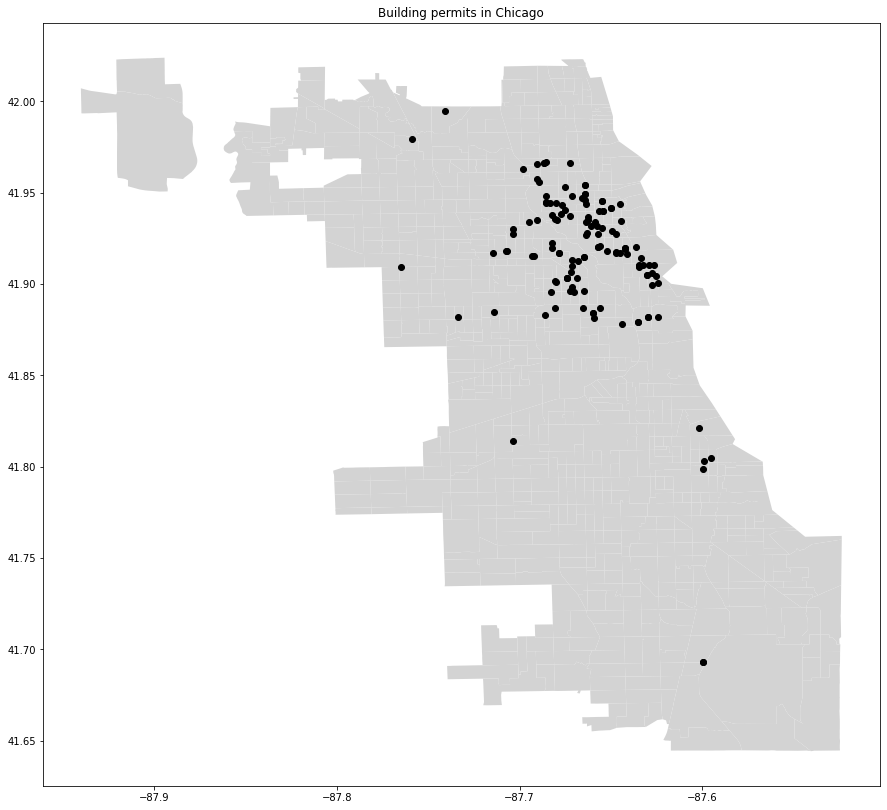

In [ ]:
fig, ax = plt.subplots(figsize = (15, 15))
chicago.plot(ax = ax, color ='lightgrey')
building_permit_geo.plot(ax = ax, color='black')
ax.set_title('Building permits in Chicago')